# Final Project: Semiconductor Company Sales Analysis by Kaelan Yim
    for COMP 122 - Spring 2023

## Table of Contents
<ul>
<li><a href="#intro">I. Introduction</a></li>
<li><a href="#wrangling">II. Data Wrangling</a></li>
<li><a href="#eda">III. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">IV. Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
I will be using a chart of semiconductor company market revenue worldwide from 2009 to 2022 from Statista.
Some companies I expect to see on there are well-known chip manufacturers like Intel, Samsung, and Micron.

The questions I will analyze are:
1. Which company grew the most from 2009 to 2022?
2. How this number compares to the average of the company's year-over-year gains?
3. Which company produced the most revenue cumulatively?

<b>Import Required Libraries:</b> The first step of coding is to import the required libraries such as Pandas, NumPy, and Matplotlib. These libraries provide useful functions for data analysis and visualization.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<b>Load the Dataset:</b> Use the Pandas library to load the dataset into a Pandas DataFrame object.

In [3]:
df = pd.read_csv(r'.\semicon.csv')

<b>Explore the Dataset:</b> Use various Pandas functions to explore the dataset, including:<br>

<b>head()</b> and <b>tail()</b> functions to view the first and last few rows of the dataset.<br>

<b>info()</b> function to get information about the data types of each column and the number of non-null values in each column.<br>

<b>describe()</b> function to get a summary of the dataset's statistical measures such as mean, standard deviation, minimum and maximum values, etc.<br>

<b>value_counts()</b> function to get the frequency of each unique value in a particular column.<br>

In [4]:
print(df.info())
print(df.head(5))
print(df.describe())
# tail and value_counts aren't relevant here
# the output is severely truncated, the print for describe doesn't even show up below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     14 non-null     int64  
 1   Samsung Electronics      14 non-null     float64
 2   Intel                    14 non-null     float64
 3   SK Hynix                 14 non-null     float64
 4   Qualcomm                 14 non-null     float64
 5   Micron Technology        14 non-null     float64
 6   Broadcom                 14 non-null     float64
 7   AMD                      3 non-null      float64
 8   Texas Instruments        14 non-null     float64
 9   MediaTek                 5 non-null      float64
 10  Apple                    2 non-null      float64
 11  STMicroelectronics       9 non-null      float64
 12  Western Digital          2 non-null      float64
 13  Renesas Technology       6 non-null      float64
 14  Infineon                 2 n

<a id='wrangling'></a>
## Data Wrangling

<b>Clean the Dataset:</b> This step involves cleaning the dataset by handling missing or duplicate values, fixing data types, and removing irrelevant columns. <br>Some of the common data cleaning techniques include:
<br>
Dropping duplicates using <b>drop_duplicates()</b> function.<br>

Handling missing values using <b>fillna()</b> function or by removing rows with missing values using <b>dropna()</b>function.<br>

Converting data types of columns using <b>astype()</b> function.
<br>
Renaming columns using <b>rename()</b> function.<br>

Removing irrelevant columns using <b>drop()</b> function.<br>

In [5]:
# no things I want to do here
# I would do fillna but it makes it harder to find the yearly average earnings when the rows are filled with extraneous zeroes

<a id='eda'></a>
## Exploratory Data Analysis

<b>Analyze the Dataset:</b> Once the dataset is cleaned, it's time to perform some analysis to gain insights. This can involve creating visualizations using Matplotlib and performing statistical analysis to answer your research questions. <br>



### Research Question 1: Which company grew the most from 2009 to 2022?

The company with the largest growth was Samsung Electronics with 47.84 billion dollars more revenue in the final reported year than the first reported year.
This was a 269.5211267605634 percent increase in revenue.


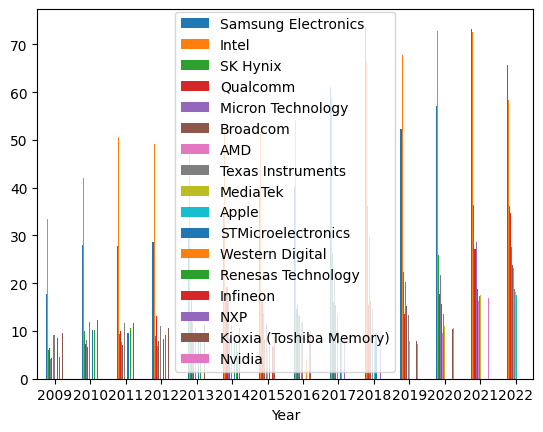

In [6]:
amogus = df.columns.tolist()
amogus = amogus[1:-1]
ax = df.plot.bar(x="Year", y=amogus, rot=0)
# not sure how to reposition the legend

sus1 = 0
sus2 = 0
sus3 = ""
sus4 = ""
sus5 = 0
sus6 = 0

for column in df.columns[1:-1]:
    begval = df[column].iloc[0]
    endval = df[column].iloc[-1]
    sus1 = endval - begval
    sus3 = column
    if sus1 > sus2:
        sus2 = sus1
        sus4 = sus3
        sus5 = begval
        sus6 = endval
# yes I excluded "Year" and "Others" since neither are really applicable here

sus7 = ((sus6 - sus5) / sus5) * 100
print("The company with the largest growth was", sus4, "with", sus2, "billion dollars more revenue in the final reported year than the first reported year.")
print("This was a", sus7, "percent increase in revenue.")

### Research Question 2: How does this number compares to the average of the company's year-over-year gains?

In [7]:
sus8 = 0
sus9 = 0
sus10 = ""
sus11 = ""

for column in df.columns[1:-1]:
    amo1 = df[column].diff()
    avgchg = amo1.mean()
    sus8 = avgchg
    sus10 = column
    if sus8 > sus9:
        sus9 = sus8
        sus11 = sus10

amo2 = df[sus3].diff()
amo3 = amo2.mean()
sus12 = amo3
    
print("The company with the highest year-over-year gain was", sus11, "at", sus9, "percent per year.")
print("The previous company mentioned above (", sus4, ") had a", sus12, "annual revenue increase.")

The company with the highest year-over-year gain was AMD at 6.81 percent per year.
The previous company mentioned above ( Samsung Electronics ) had a 4.745 annual revenue increase.


### Research Question 3: Which company produced the most revenue cumulatively?

In [8]:
sus13 = 0
sus14 = ""

for column in df.columns[1:-1]:
    coltot = df[column].sum()
    if coltot > sus13:
        sus13 = coltot
        sus14 = column

print(sus14, "had the highest total cumulative revenue at", sus13, "billion dollars over the reported time period.")

Intel had the highest total cumulative revenue at 778.33 billion dollars over the reported time period.


<a id='conclusions'></a>
## Conclusions

Draw Conclusion: Finally, summarize your findings and draw conclusions based on your analysis.

If I had to invest in only one of the companies on the datasheet as a consumer, I would likely invest in **Samsung** because of the large growth the company has experienced. **AMD** would also be a good choice from the data results above but because it only has entries for three years of data the numbers could be unreliable. If I were a hedge fund manager, I would invest in **Intel** because they have produced earnings reliably for a long time.